In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_data(stock_data, stock):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Open'], label='Open')
    plt.plot(stock_data['Close'], label='Close')
    plt.title(f'{stock} Opening and Closing Prices')
    plt.ylabel('Price')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.bar(stock_data.index, stock_data['Volume'], color='orange')
    plt.title(f'{stock} Volume of Sales')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    
    plt.tight_layout()
    plt.show()

In [3]:
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
stock_data = {stock: yf.download(stock, period='2y') for stock in stocks}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


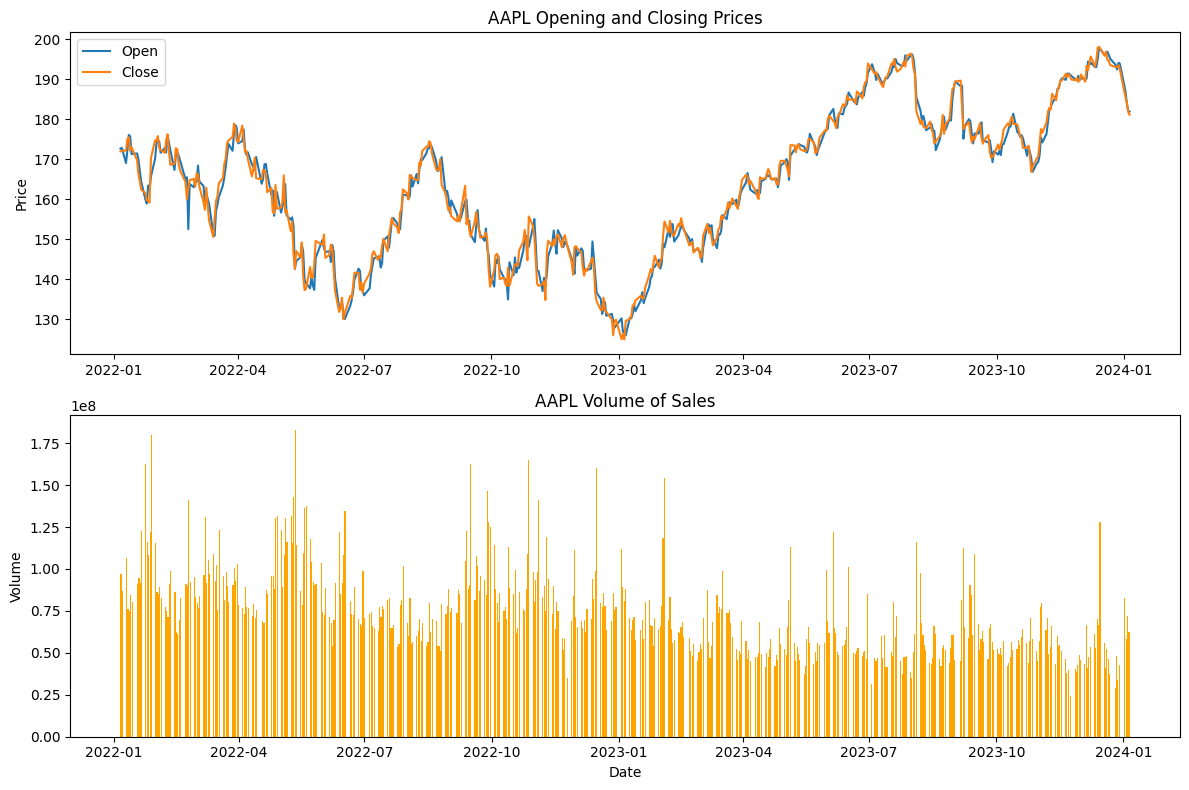

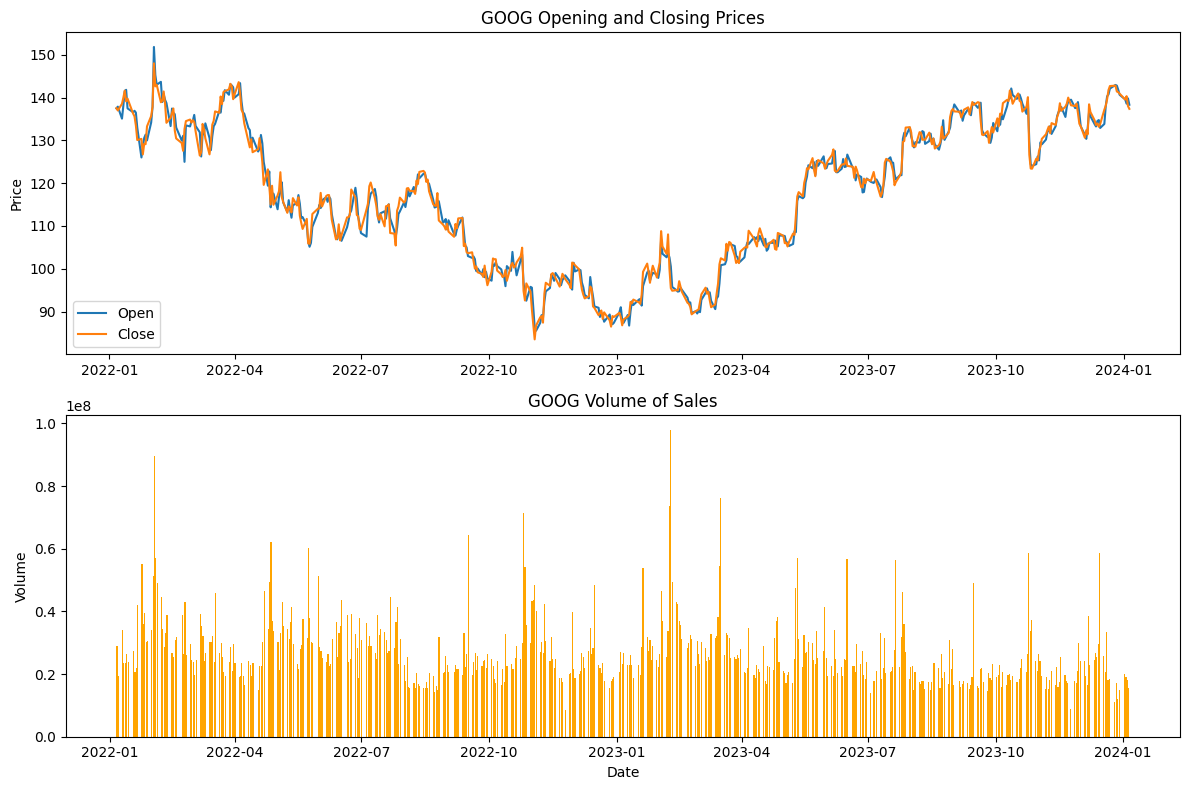

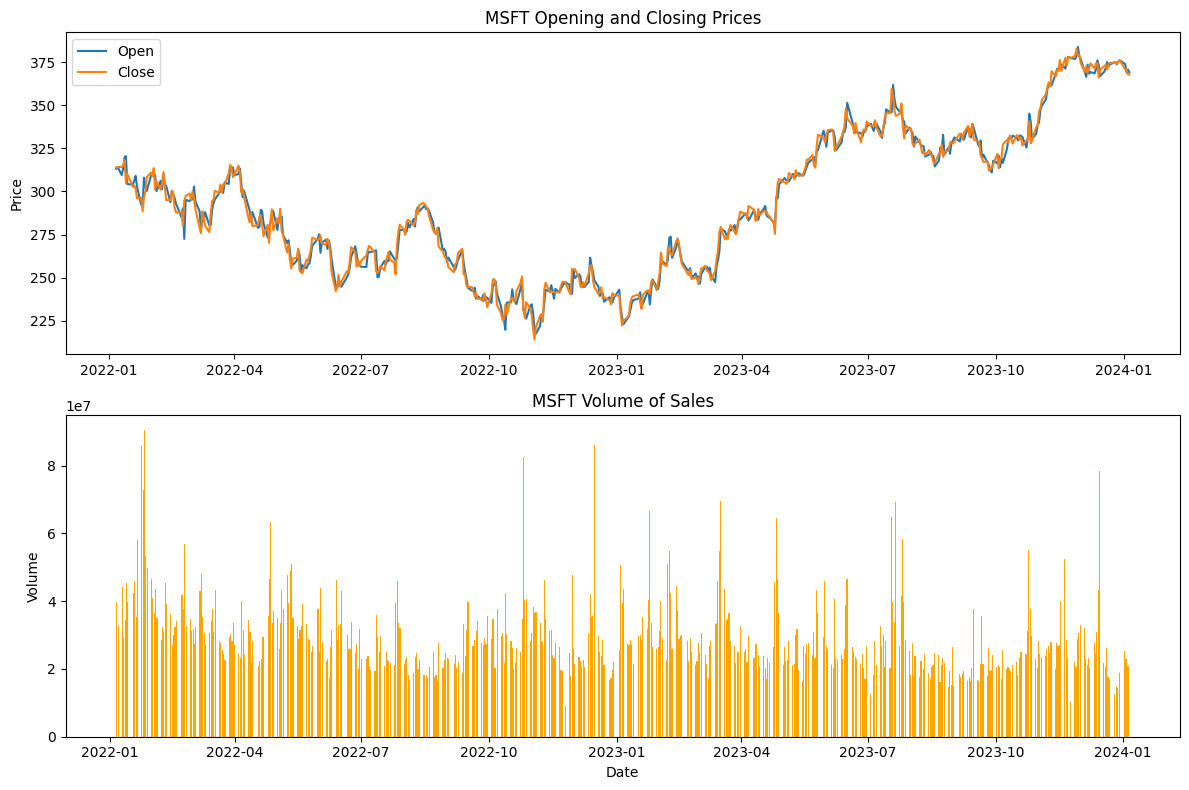

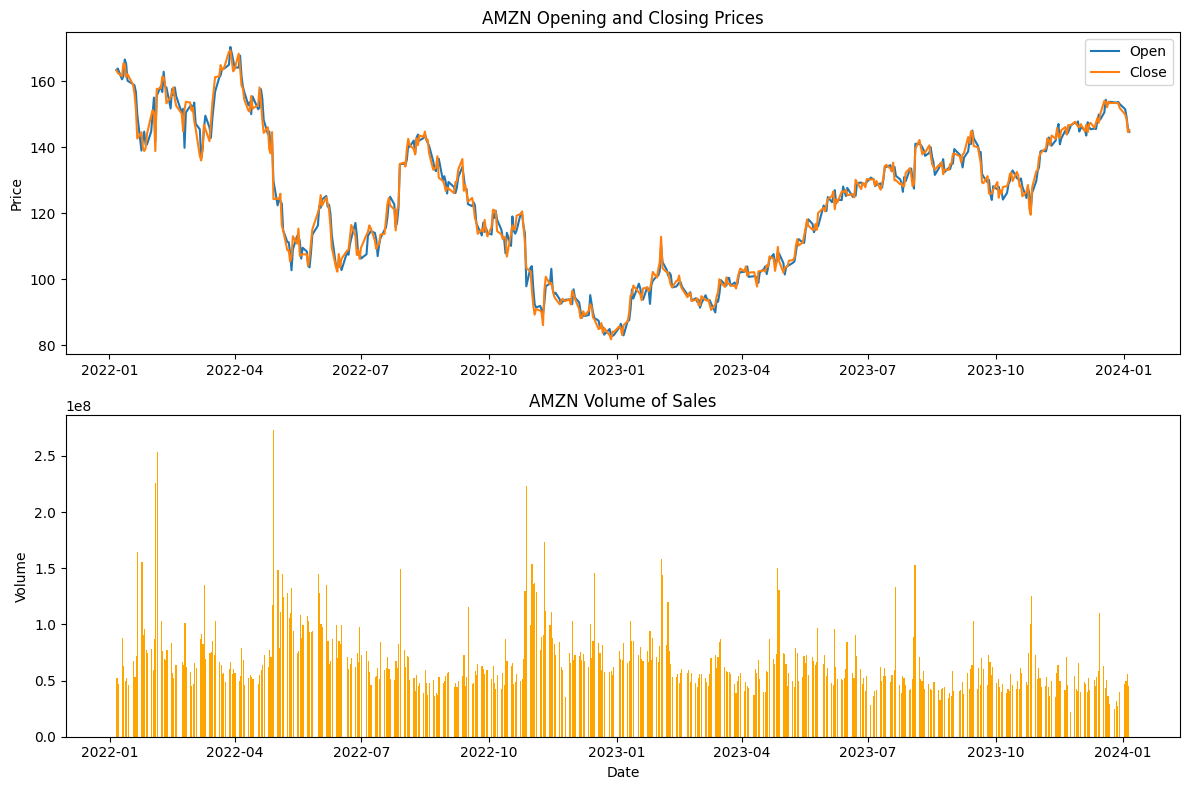

In [4]:
for stock, data in stock_data.items():
    plot_data(data, stock)

In [5]:
def plot_moving_averages(stock_data, stock_name):
    plt.figure(figsize=(10, 6))
    stock_data['Close'].rolling(window=50).mean().plot(label='50-Day MA')
    stock_data['Close'].rolling(window=200).mean().plot(label='200-Day MA')
    plt.title(f'{stock_name} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

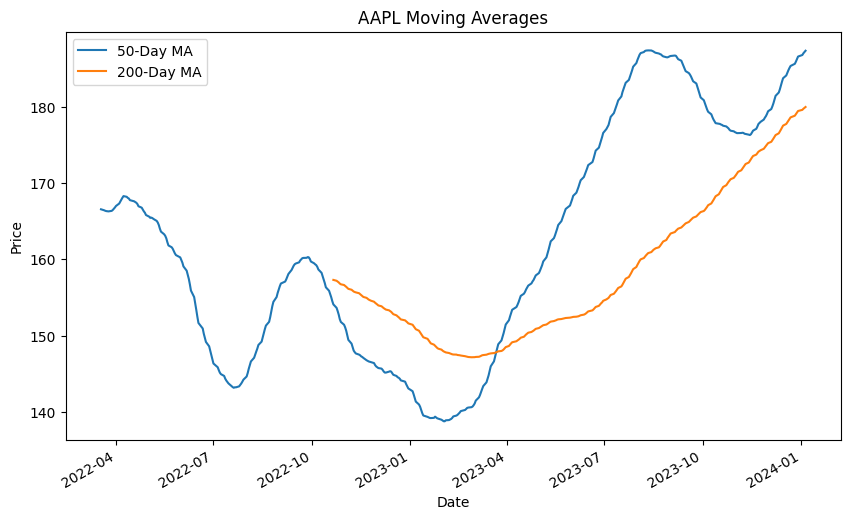

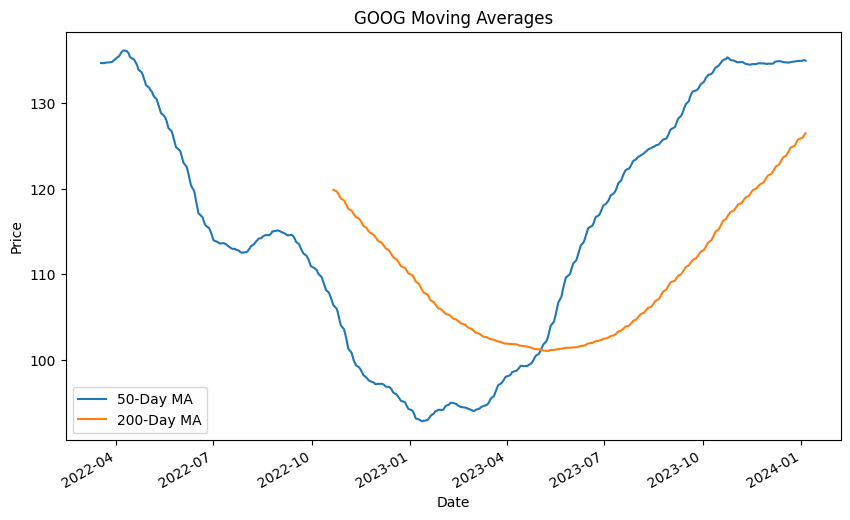

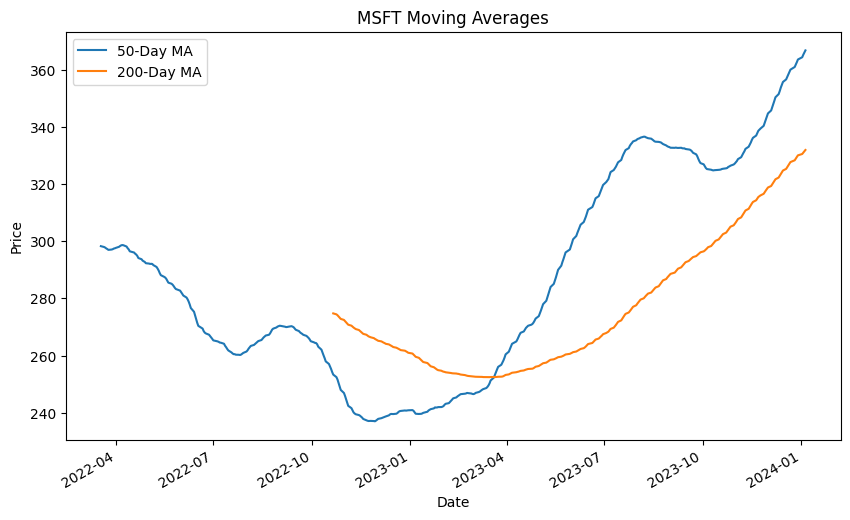

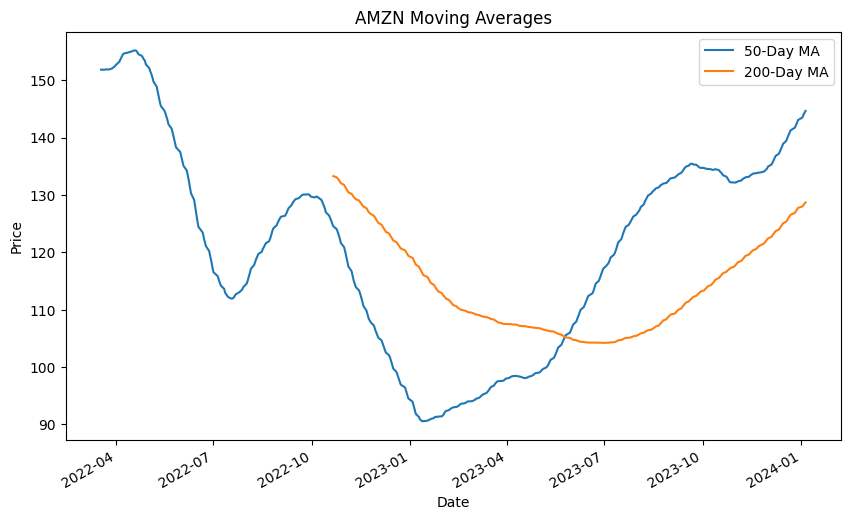

In [6]:
for stock, data in stock_data.items():
    plot_moving_averages(data, stock)

In [12]:
def plot_returns(data, stock_name):
    data['Daily Return'] = data['Close'].pct_change()
    data['Monthly Return'] = data['Close'].pct_change(periods=20)  # Assuming 20 trading days in a month

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(data['Daily Return'], label='Daily Return')
    plt.title(f'{stock_name} Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(data['Monthly Return'], label='Monthly Return', color='orange')
    plt.title(f'{stock_name} Monthly Returns')
    plt.xlabel('Date')
    plt.ylabel('Monthly Return')
    plt.legend()

    plt.tight_layout()
    plt.show()

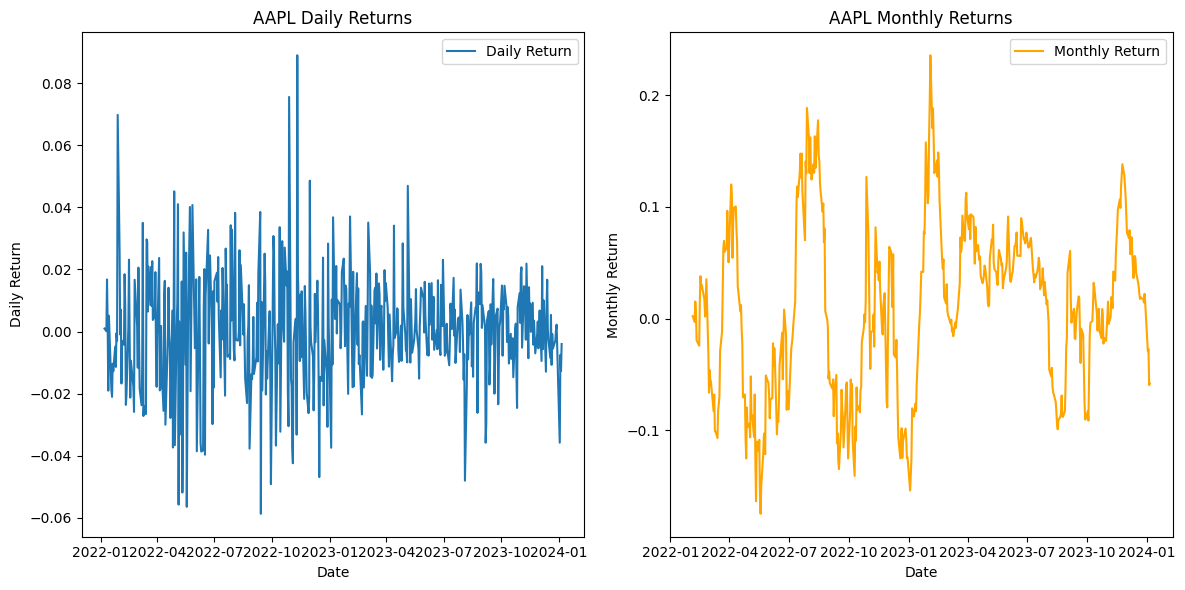

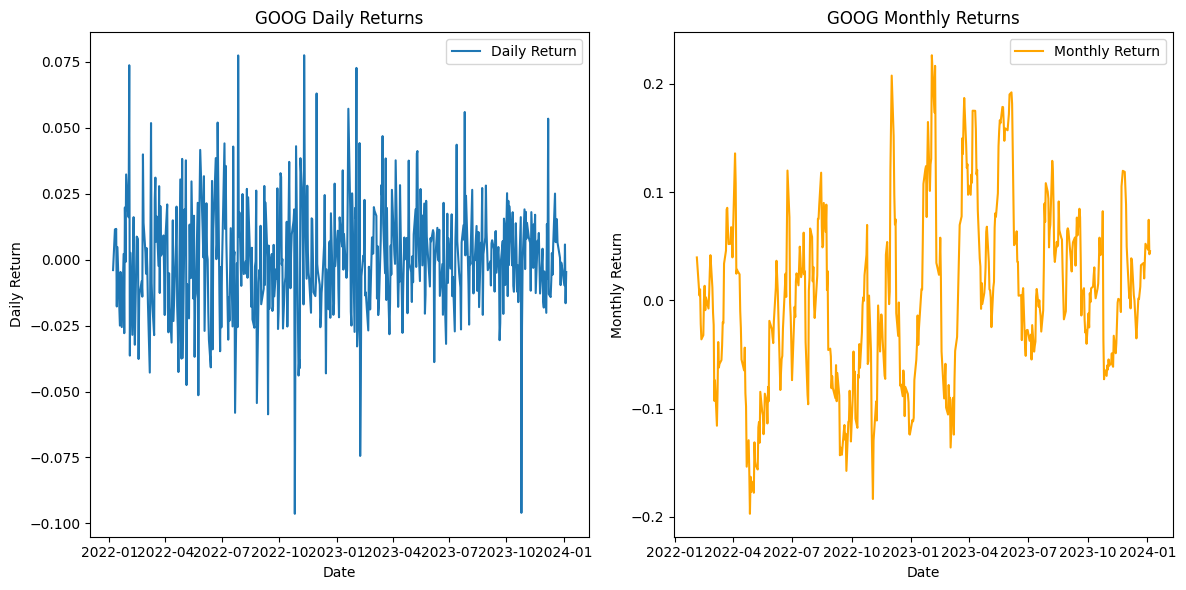

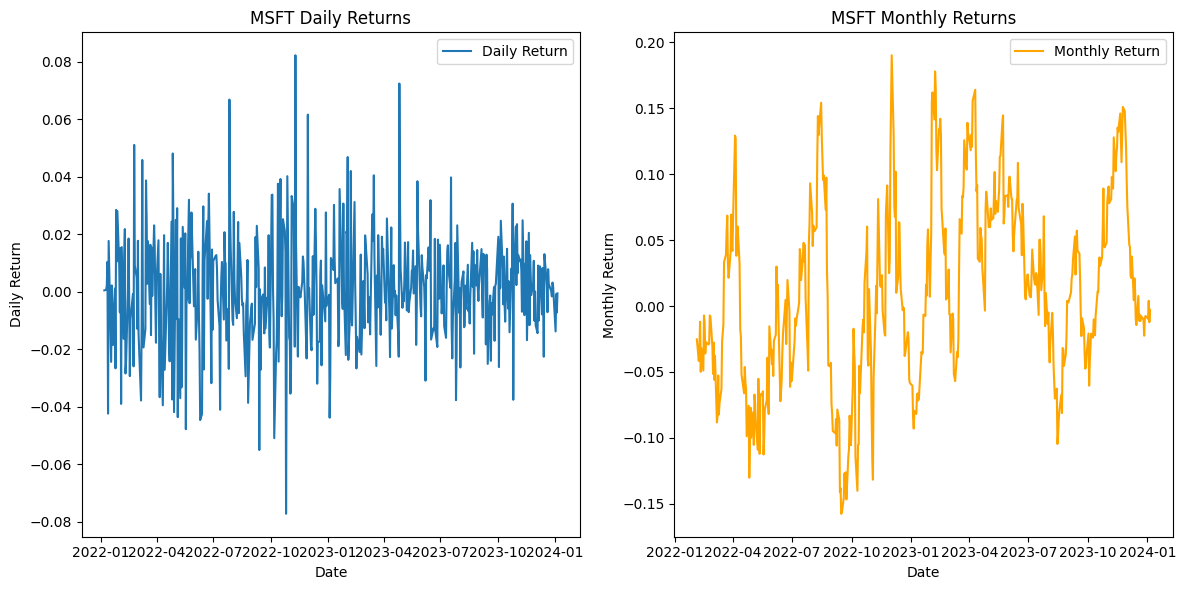

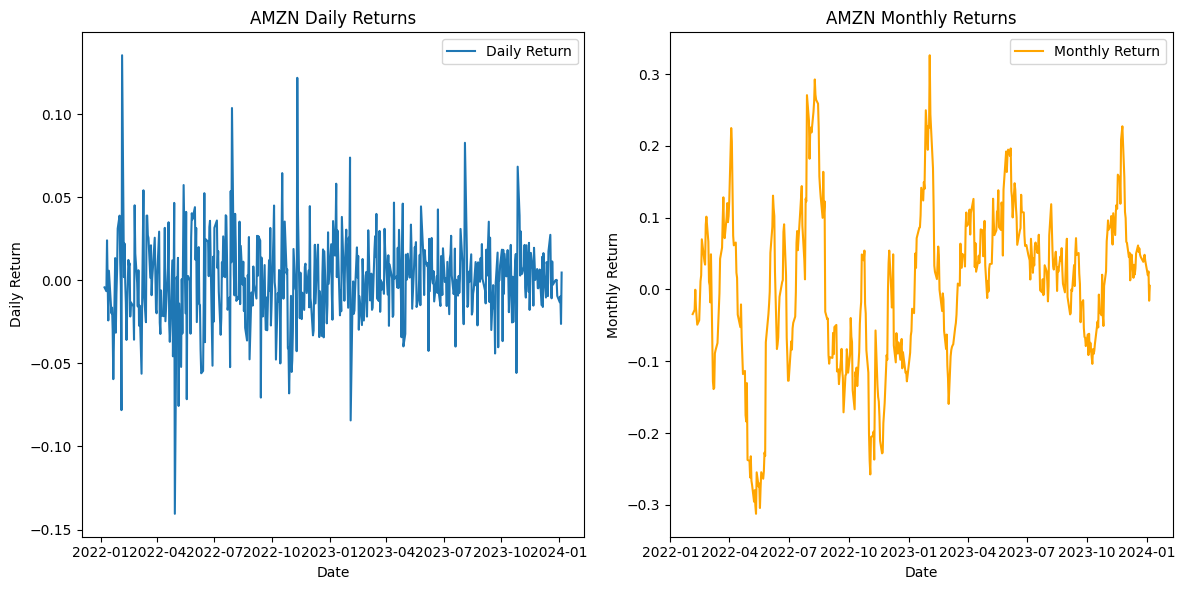

In [13]:
for stock, data in stock_data.items():
    plot_returns(data, stock)

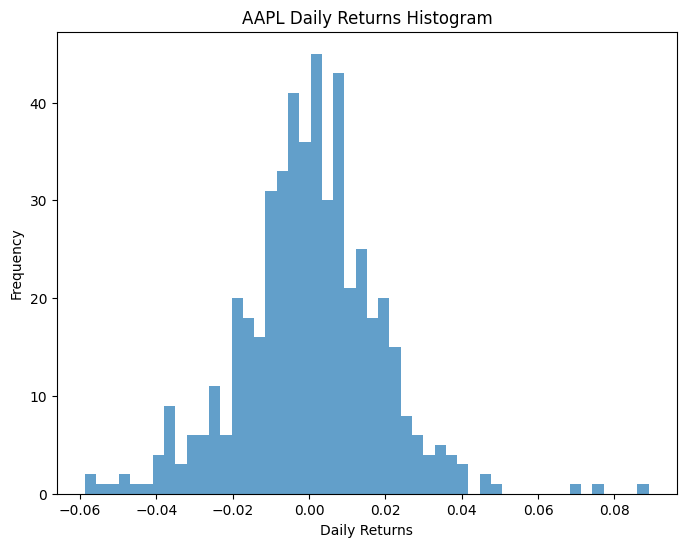

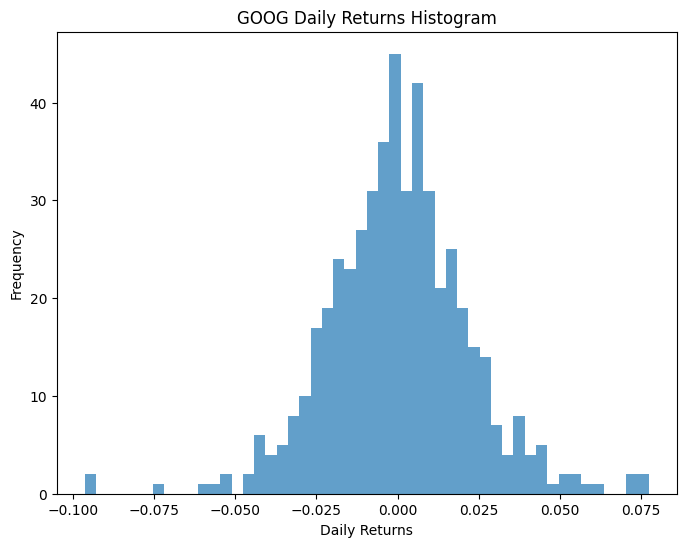

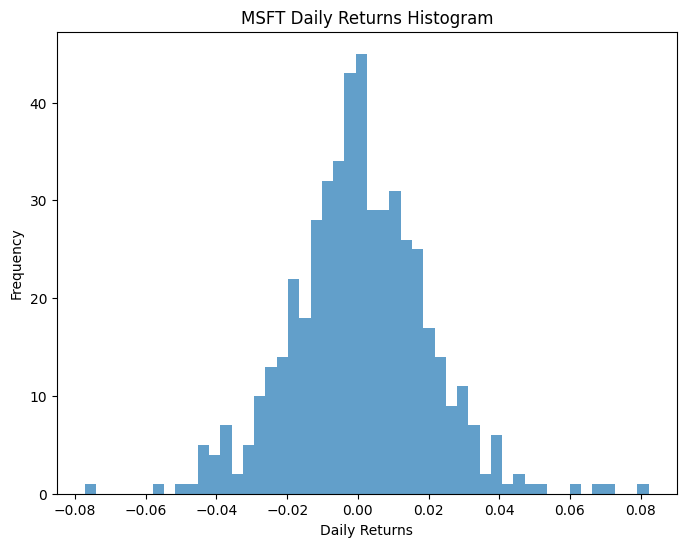

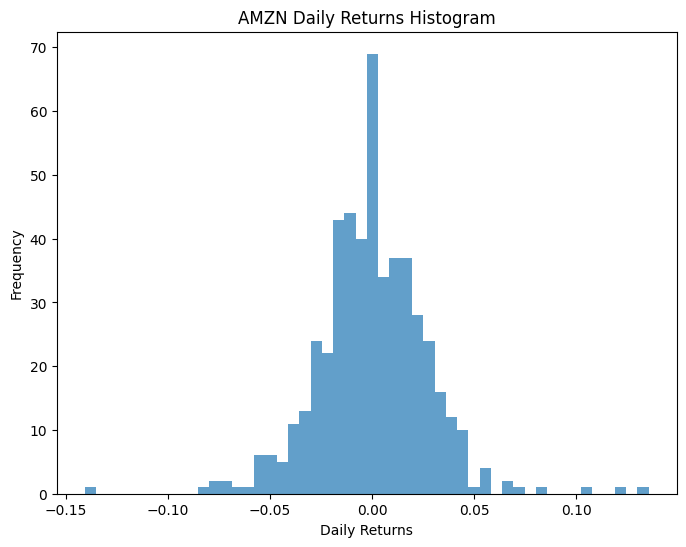

In [7]:
for stock, data in stock_data.items():
    data['Daily Return'] = data['Close'].pct_change()
    plt.figure(figsize=(8, 6))
    plt.hist(data['Daily Return'].dropna(), bins=50, alpha=0.7)
    plt.title(f'{stock} Daily Returns Histogram')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')
    plt.show()

In [8]:
for stock1, data1 in stock_data.items():
    for stock2, data2 in stock_data.items():
        if stock1 != stock2:
            correlation = data1['Daily Return'].corr(data2['Volume'])
            print(f'Correlation between {stock1} and {stock2}: {correlation}')


Correlation between AAPL and GOOG: -0.020178197625090218
Correlation between AAPL and MSFT: -0.023285088855528567
Correlation between AAPL and AMZN: -0.016193722633592485
Correlation between GOOG and AAPL: 0.011718580239930679
Correlation between GOOG and MSFT: -0.0535688685218863
Correlation between GOOG and AMZN: 0.013690294866461722
Correlation between MSFT and AAPL: -0.01644016686783045
Correlation between MSFT and GOOG: 0.007635522367794524
Correlation between MSFT and AMZN: 0.0065545327425649
Correlation between AMZN and AAPL: -0.05136741942009446
Correlation between AMZN and GOOG: -0.041922984189128536
Correlation between AMZN and MSFT: -0.07383517561834901


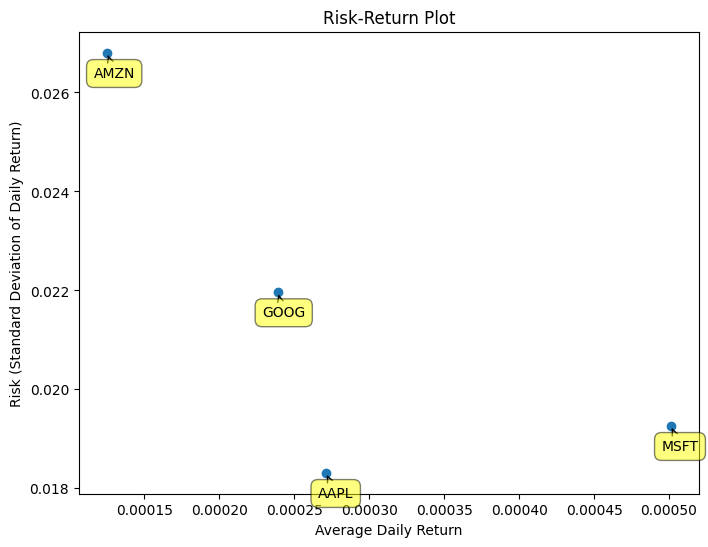

In [11]:
returns = pd.DataFrame({stock: data['Daily Return'] for stock, data in stock_data.items()})
plt.figure(figsize=(8, 6))
plt.scatter(returns.mean(), returns.std())
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(20, -20), textcoords='offset points',
                 ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
plt.title('Risk-Return Plot')
plt.xlabel('Average Daily Return')
plt.ylabel('Risk (Standard Deviation of Daily Return)')
plt.show()